In [ ]:
# Relevant words from Tweets
 We want to look for relevant words around eq

## Imports

In [9]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt  

import nltk
from nltk.corpus import stopwords

In [8]:
from wordcloud import WordCloud, ImageColorGenerator

## Loading Data from bucket

In [24]:
body1 = client_bbf13ad6752b42dbbd10e5e6c302e287.get_object(Bucket='sismos-donotdelete-pr-u6g7aeqryeee8u',Key='Twitter_1.json')['Body']

In [25]:
body2 = client_bbf13ad6752b42dbbd10e5e6c302e287.get_object(Bucket='sismos-donotdelete-pr-u6g7aeqryeee8u',Key='Twitter_2.json')['Body']

In [26]:
body3 = client_bbf13ad6752b42dbbd10e5e6c302e287.get_object(Bucket='sismos-donotdelete-pr-u6g7aeqryeee8u',Key='Twitter_3.json')['Body']

In [27]:
df_data_1 = pd.read_json(body1, orient='values')
df_data_1.head()

,result
0,{'created_at': 'Tue Sep 26 23:54:57 +0000 2017...
1,{'created_at': 'Tue Sep 26 23:54:00 +0000 2017...
2,{'created_at': 'Tue Sep 26 23:53:08 +0000 2017...
3,{'created_at': 'Tue Sep 26 23:49:56 +0000 2017...
4,{'created_at': 'Tue Sep 26 23:49:12 +0000 2017...


In [28]:
df_data_2 = pd.read_json(body2, orient='values')
df_data_2.head()

,result
0,{'created_at': 'Mon Sep 25 23:26:01 +0000 2017...
1,{'created_at': 'Mon Sep 25 22:36:35 +0000 2017...
2,{'created_at': 'Mon Sep 25 22:32:19 +0000 2017...
3,{'created_at': 'Mon Sep 25 21:37:04 +0000 2017...
4,{'created_at': 'Mon Sep 25 20:07:11 +0000 2017...


In [29]:
df_data_3 = pd.read_json(body3, orient='values')
df_data_3.head()

,result
0,{'created_at': 'Mon Sep 25 04:53:29 +0000 2017...
1,{'created_at': 'Mon Sep 25 04:52:52 +0000 2017...
2,{'created_at': 'Mon Sep 25 04:52:03 +0000 2017...
3,{'created_at': 'Mon Sep 25 04:51:26 +0000 2017...
4,{'created_at': 'Mon Sep 25 04:50:39 +0000 2017...


## Union data

In [67]:
data_total = pd.concat([df_data_1, df_data_2, df_data_3], ignore_index=True)

In [30]:
data = []

### Selecting data for relevant words

In [68]:
for t in data_total.result:
    user = t["user"]
    #print(user["id"])
    list_to = ()
    list_to = [t["text"], user["id"], t["coordinates"]]
    
    data.append(list_to)

In [69]:
data[0][0]

'#Sismo: Te Ayudamos a contestar preguntas legales recurrentes.  Necesitamos respuestas que sean de utilidad.  https://t.co/ykEhm1AOoA'

## Removing links

In [70]:
import re

### Joined data

In [71]:
# Start with one review:
text = " ".join(review[0] for review in data)

### Removing links

In [74]:
text_without_link = re.sub(r' https:\/\/t.co\/.+ ', '', text, flags=re.MULTILINE)
print(text_without_link[:1000])

#Sismo: Te Ayudamos a contestar preguntas legales recurrentes.  Necesitamos respuestas que sean de utilidad. 

Ayudemos #MexicoEstaDePie y más fuerte 🇲🇽🇲🇽🇲🇽 #necesitamos #necesitan #urgente #sismo #mexico #FuerzaMexico
#FuerzaMexico #Sismo #SismosMexico2017 RT @TravelReportMX: 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT @TravelReportMX: 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT @CruzRoja_MX: Necesitamos los siguientes artículos. #Sismo #CruzRoja #CDMX #RTcerrado=Silencio
✋🏻 Palma=Nadie se mueve 
☝🏻 Dedo=Sigamos trabajando
🙌🏻 Necesitamos Agua

#Sismo #MéxicoDePie RT @vtrcombat: Amigos necesitamos lonas en ixtepec, Oaxaca. Empieza la lluvia #Sismo #FuerzaMexico 
@scoutsdemexico!
#mexico… RT @TravelReportMX: 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT

### Removing Usernames

In [83]:
text_without_usernames = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', '', text_without_link, flags=re.MULTILINE)
print(text_without_usernames[:1000])

#Sismo: Te Ayudamos a contestar preguntas legales recurrentes.  Necesitamos respuestas que sean de utilidad. 

Ayudemos #MexicoEstaDePie y más fuerte 🇲🇽🇲🇽🇲🇽 #necesitamos #necesitan #urgente #sismo #mexico #FuerzaMexico
#FuerzaMexico #Sismo #SismosMexico2017 RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT : Necesitamos los siguientes artículos. #Sismo #CruzRoja #CDMX #RTcerrado=Silencio
✋🏻 Palma=Nadie se mueve 
☝🏻 Dedo=Sigamos trabajando
🙌🏻 Necesitamos Agua

#Sismo #MéxicoDePie RT : Amigos necesitamos lonas en ixtepec, Oaxaca. Empieza la lluvia #Sismo #FuerzaMexico 
!
#mexico… RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos

In [85]:
text_without_whitespaces = re.sub(r'\s+', ' ', text_without_usernames)
print(text_without_whitespaces[:1000])

#Sismo: Te Ayudamos a contestar preguntas legales recurrentes. Necesitamos respuestas que sean de utilidad. Ayudemos #MexicoEstaDePie y más fuerte 🇲🇽🇲🇽🇲🇽 #necesitamos #necesitan #urgente #sismo #mexico #FuerzaMexico #FuerzaMexico #Sismo #SismosMexico2017 RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT : Necesitamos los siguientes artículos. #Sismo #CruzRoja #CDMX #RTcerrado=Silencio ✋🏻 Palma=Nadie se mueve ☝🏻 Dedo=Sigamos trabajando 🙌🏻 Necesitamos Agua #Sismo #MéxicoDePie RT : Amigos necesitamos lonas en ixtepec, Oaxaca. Empieza la lluvia #Sismo #FuerzaMexico ! #mexico… RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos voluntarios, agua, hielos, sueros y reh… RT : 🆘 Urgen cortadoras de cemento de 14 Y 17 en A. Obregón 286. también necesitamos volun

In [103]:
text_without_special = re.sub(r'\W+', ' ', text_without_whitespaces)
print(text_without_special[:1000])

 Sismo Te Ayudamos a contestar preguntas legales recurrentes Necesitamos respuestas que sean de utilidad Ayudemos MexicoEstaDePie y más fuerte necesitamos necesitan urgente sismo mexico FuerzaMexico FuerzaMexico Sismo SismosMexico2017 RT Urgen cortadoras de cemento de 14 Y 17 en A Obregón 286 también necesitamos voluntarios agua hielos sueros y reh RT Urgen cortadoras de cemento de 14 Y 17 en A Obregón 286 también necesitamos voluntarios agua hielos sueros y reh RT Necesitamos los siguientes artículos Sismo CruzRoja CDMX RTcerrado Silencio Palma Nadie se mueve Dedo Sigamos trabajando Necesitamos Agua Sismo MéxicoDePie RT Amigos necesitamos lonas en ixtepec Oaxaca Empieza la lluvia Sismo FuerzaMexico mexico RT Urgen cortadoras de cemento de 14 Y 17 en A Obregón 286 también necesitamos voluntarios agua hielos sueros y reh RT Urgen cortadoras de cemento de 14 Y 17 en A Obregón 286 también necesitamos voluntarios agua hielos sueros y reh RT Urgen cortadoras de cemento de 14 Y 17 en A Obreg

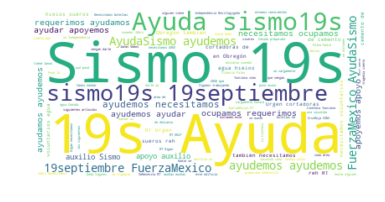

In [105]:
# Create stopword list:
stop_words_sp = set(stopwords.words('spanish'))
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white").generate(text_without_special)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusions

> #### Relevant Hastags
- #Sismo
- #19s
- #Ayuda
- #sismo19s
- #19septiembre
- #FuerzaMexico
- #AyudaSismo

> ### What kind of help people ask for?
 - Rubble collection
 - Transport
 - Nonperishable food
 - First aid kits
 - Construction tools
 - Psychological help
 